# <center> Insurance Charges Prediction

- Dataset Information

Column ------------------------------> Description

Age ---------------------------------> Age of Primary Beneficiary

Sex ---------------------------------> Insurance Contractor gender 
                                       (female, male)
                                 
BMI ---------------------------------> Body Mass Index, providing an understanding
                                       of body, weights that are relatively high or low                                                                            relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9

Children ----------------------------> Number of children covered by health                                     insurance / Number of dependents

Smoker ------------------------------> Whether the beneficiary smokes or not

Region-------------------------------> The beneficiary’s residential area in the                                 US, northeast, southeast, southwest,                                     northwest.

charges	-----------------------------> Individual medical costs billed by health insurance (target variable)


## 1. Importing Important Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import pylab as pl
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)

## 2. Importing Data

In [69]:
Insurance = pd.read_csv("insurance.csv")
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Exploratory Data Analysis

In [70]:
Insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [71]:
# Dimensions of dataset
Insurance.shape

(1338, 7)

In [72]:
# Number of Elements in dataset
Insurance.size

9366

In [73]:
# Summary of Dataframe
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
# Descriptive Statistics of Dataset
Insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


*Inference*

- 'Charges' column is our target variable.
- Four columns are numerical and 3 are catagorical.
- Age group of beneficiary is ranging from 18 - 64. 
- BMI is ranging from 15 to 53 so we have beneficiary with weight status of underweight, healthy weight, overweight and Obese. 
- Allmost 80% people are non-smoker. 
- Categorical variables : ['sex', 'smoker', 'region']
- Numerical variables : ['age', 'bmi', 'children', 'charges']

In [75]:
# Seperating categorical and numerical variables
Insurance_categorical = Insurance.select_dtypes(include='object')
Insurance_numerical = Insurance.select_dtypes(include=['int','float'])

In [76]:
# Count of unique rows

for i in Insurance[['sex', 'smoker', 'region', 'children']].columns:
    print(i)
    print(Insurance[i].value_counts())
    print('************--------**************')

sex
male      676
female    662
Name: sex, dtype: int64
************--------**************
smoker
no     1064
yes     274
Name: smoker, dtype: int64
************--------**************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
************--------**************
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
************--------**************


### 3A. Univariate Analysis

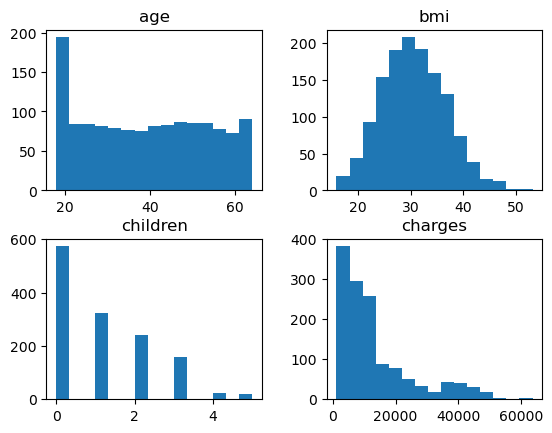

In [77]:
# Distribution of dataset

Insurance.hist(grid=False, bins=15)
plt.show()

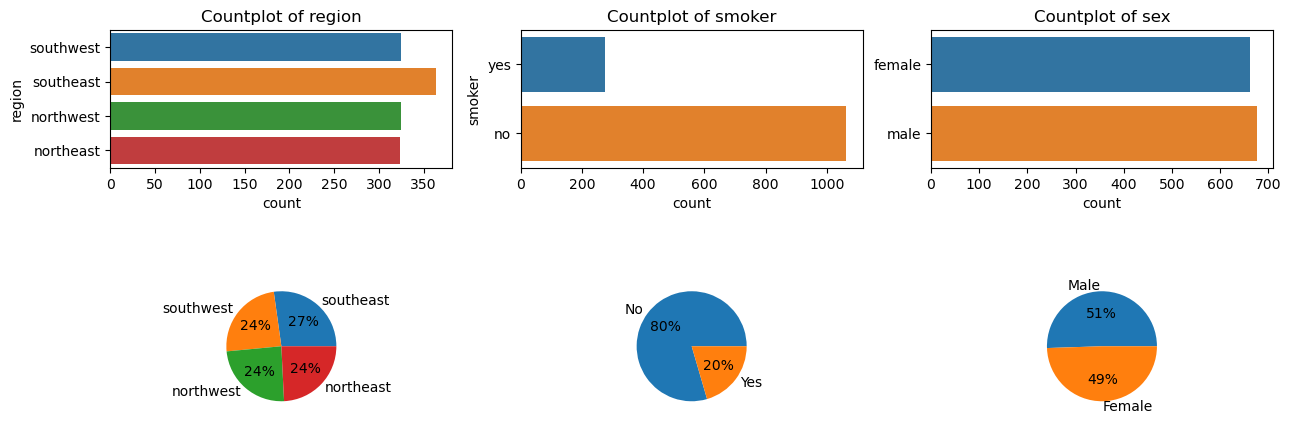

In [78]:
# Countplot of categorical variable

plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
sns.countplot(data=Insurance, y='region')
plt.title('Countplot of region')

plt.subplot(2,3,2)
sns.countplot(data=Insurance, y='smoker')
plt.title('Countplot of smoker')

plt.subplot(2,3,3)
sns.countplot(data=Insurance, y='sex')
plt.title('Countplot of sex')
plt.ylabel('')

plt.subplot(2,3,4)
plt.pie(Insurance_categorical.region.value_counts(), labels=['southeast', 'southwest', 'northwest', 'northeast'], autopct='%.0f%%')

plt.subplot(2,3,5)
plt.pie(Insurance_categorical.smoker.value_counts(), labels=['No', 'Yes'], autopct='%.0f%%')

plt.subplot(2,3,6)
plt.pie(Insurance_categorical.sex.value_counts(), labels=['Male','Female'], autopct='%.0f%%')

pl.subplots_adjust(hspace=0.8)

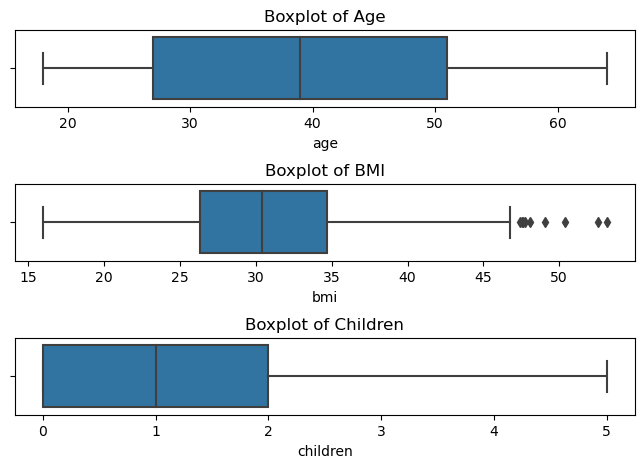

In [79]:
# Boxplot for outliers

plt.figure(figsize=(8,5))

plt.subplot(3,1,1)
sns.boxplot(data=Insurance, x='age', orient='h')
plt.title('Boxplot of Age')

plt.subplot(3,1,2)
sns.boxplot(data=Insurance, x='bmi', orient='h')
plt.title('Boxplot of BMI')

plt.subplot(3,1,3)
sns.boxplot(data=Insurance, x='children', orient='h')
plt.title('Boxplot of Children')
pl.subplots_adjust( hspace=1)

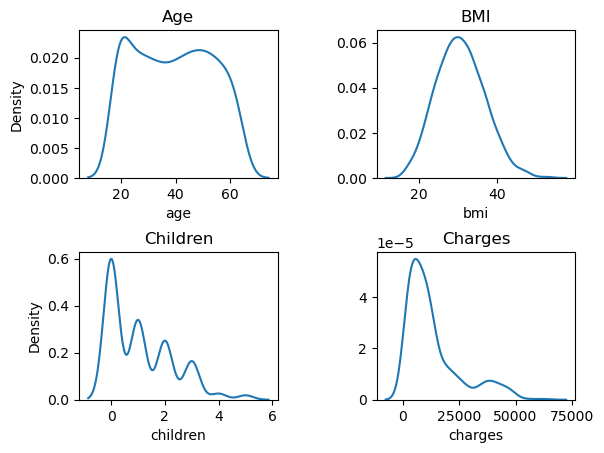

In [80]:
# Distplot for understanding distribution of data

plt.subplot(2,2,1)
sns.distplot(Insurance.age, hist=False)
plt.title('Age')

plt.subplot(2,2,2)
sns.distplot(Insurance.bmi, hist=False)
plt.title('BMI')
plt.ylabel("")

plt.subplot(2,2,3)
sns.distplot(Insurance.children, hist=False)
plt.title('Children')

plt.subplot(2,2,4)
sns.distplot(Insurance.charges, hist=False)
plt.title('Charges')
plt.ylabel("")

pl.subplots_adjust( hspace=0.5, wspace=0.5)

*Inference*

- Many beneficiaries dont have children and max children count is 5.
- Count of charges is higher between range of 0 to 20000 .
- There is no significant difference between count of region and sex.
- Outliers are present in BMI column, will work on this in data preprocessing step.
- Charges, bmi, children column is right skewed.

### 3B. Bivariate Analysis

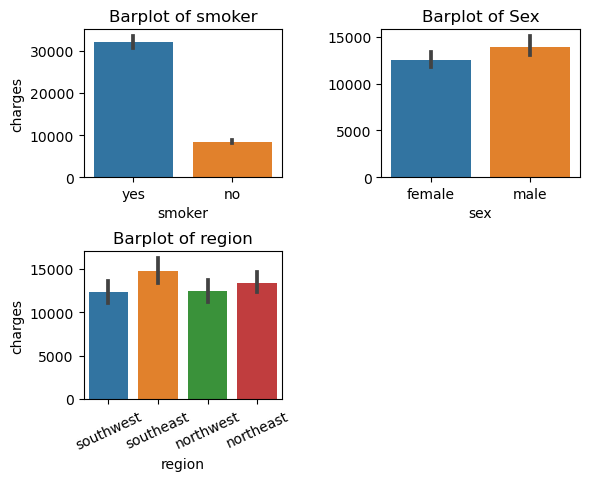

In [81]:
# Barplot of charges and categorical variables

plt.subplot(2,2,1)
sns.barplot(data=Insurance, x='smoker', y='charges')
plt.title('Barplot of smoker')

plt.subplot(2,2,2)
sns.barplot(data=Insurance, x='sex', y='charges')
plt.title('Barplot of Sex')
plt.ylabel("")

plt.subplot(2,2,3)
sns.barplot(data=Insurance, x='region', y='charges')
plt.title('Barplot of region')
plt.xticks(rotation=25)
pl.subplots_adjust( hspace=0.5, wspace=0.5)

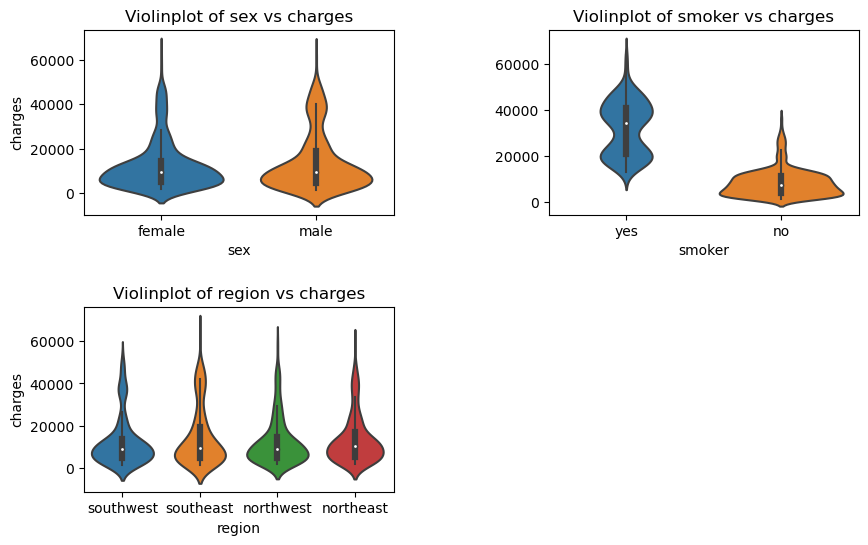

In [82]:
# Violinplot 

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(data=Insurance, x='sex', y='charges')
plt.title('Violinplot of sex vs charges')

plt.subplot(2,2,2)
sns.violinplot(data=Insurance, x='smoker', y='charges')
plt.title('Violinplot of smoker vs charges')
plt.ylabel("")

plt.subplot(2,2,3)
sns.violinplot(data=Insurance, x='region', y='charges')
plt.title('Violinplot of region vs charges')

pl.subplots_adjust( hspace=0.5, wspace=0.5)

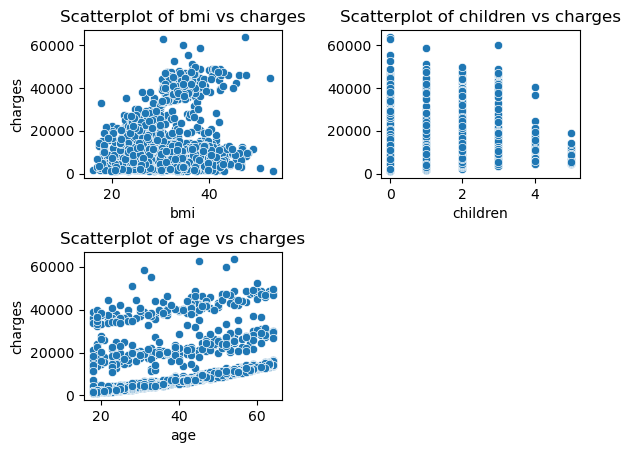

In [83]:
# Scatterplot of numerical variables

plt.subplot(2,2,1)
sns.scatterplot(data=Insurance, x='bmi', y='charges')
plt.title('Scatterplot of bmi vs charges')

plt.subplot(2,2,2)
sns.scatterplot(data=Insurance, x='children', y='charges')
plt.title('Scatterplot of children vs charges')
plt.ylabel("")

plt.subplot(2,2,3)
sns.scatterplot(data=Insurance, x='age', y='charges')
plt.title('Scatterplot of age vs charges')

pl.subplots_adjust( hspace=0.5, wspace=0.5)

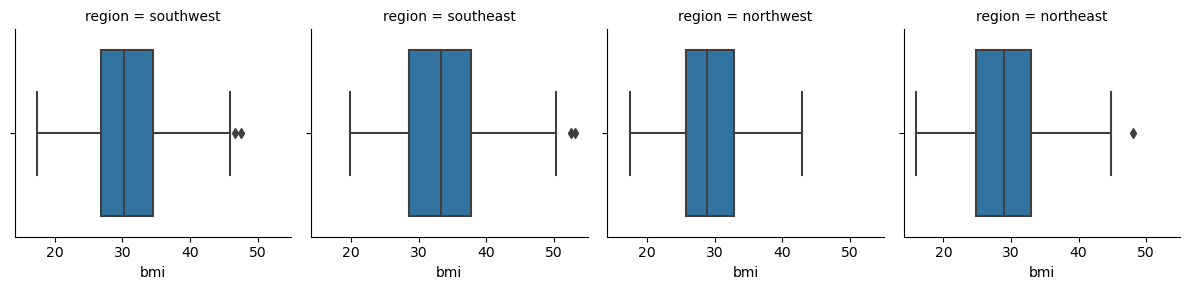

In [84]:
# Facet grid to analyze outliers

grid=sns.FacetGrid(data=Insurance, col='region')
grid.map(sns.boxplot, 'bmi')
plt.show()

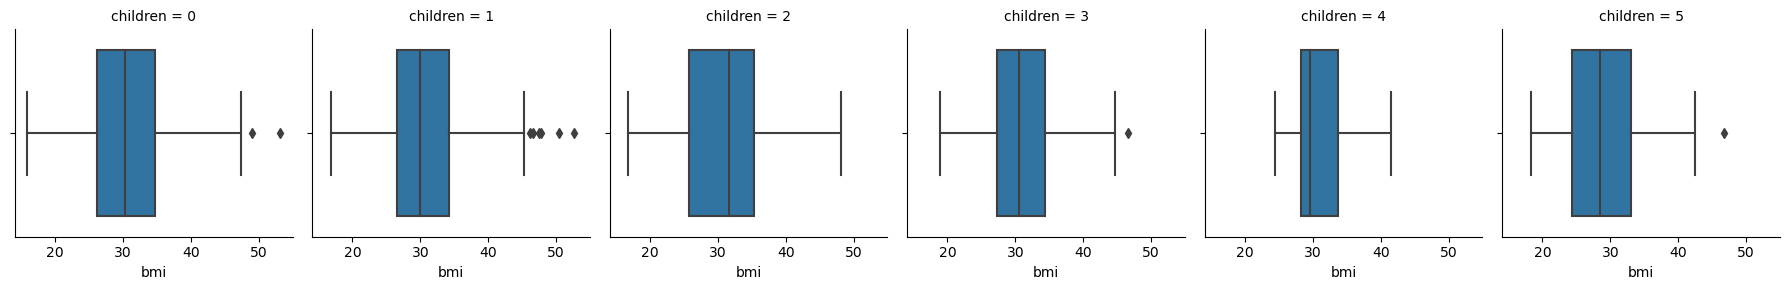

In [85]:
# Facet grid to analyze outliers

grid=sns.FacetGrid(data=Insurance, col='children')
grid.map(sns.boxplot, 'bmi')
plt.show()

*Inference*

- In dataset the number of smokers are very less but average Insurance charges for smoker is higher than non-smoker.
- Average Insurance chareges seems to be euqal for all the regions.
- BMI and age is showing slight positive correlation with charges.
- Except Northwest all other regions have outliers in bmi. 

### 3C. Multivariate Analysis

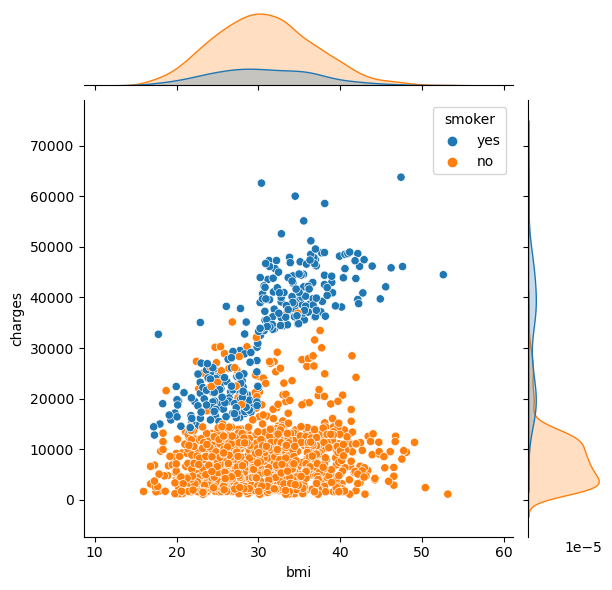

In [86]:
# Jointplot of BMI vs Charges 

sns.jointplot(data=Insurance, x='bmi', y='charges', hue='smoker', kind='scatter')
plt.show()

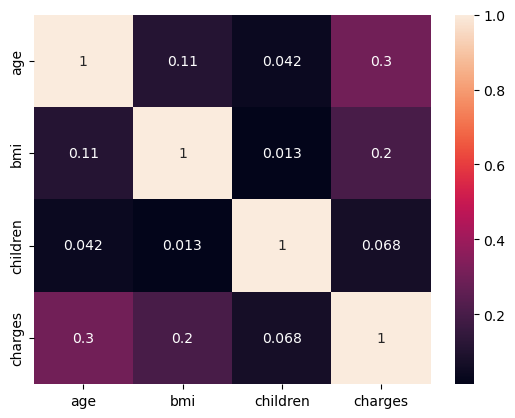

In [87]:
# Pairwise correlation of variables

sns.heatmap(Insurance.corr(), annot=True)
plt.show()

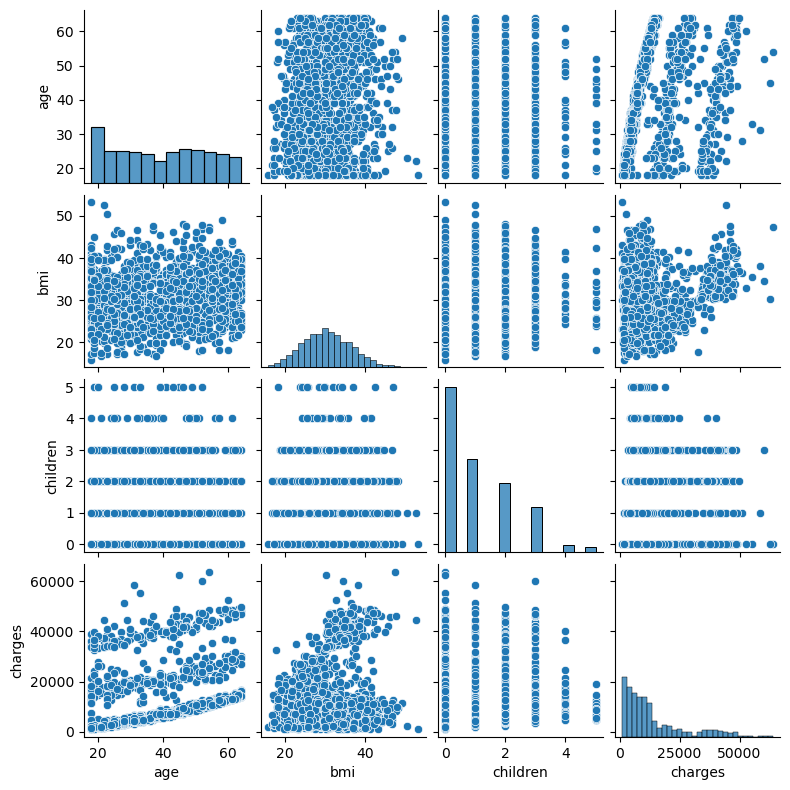

In [88]:
# Pairwise relationship in dataset

sns.pairplot(Insurance, height=2)
plt.show()

In [89]:
pd.pivot_table(Insurance, index='region', values='bmi' ,columns='sex', aggfunc='mean', margins=True)

sex,female,male,All
region,,,
northeast,29.324317,29.024540,29.173503
northwest,29.277957,29.120155,29.199785
southeast,32.671257,33.990000,33.355989
southwest,30.060494,31.129448,30.596615
All,30.377749,30.943129,30.663397


In [90]:
pd.pivot_table(Insurance, index='smoker', values='charges' ,columns='sex', aggfunc='mean', margins=True)

sex,female,male,All
smoker,,,
no,8762.297300,8087.204731,8434.268298
yes,30678.996276,33042.005975,32050.231832
All,12569.578844,13956.751178,13270.422265


* Inference*

- BMI of non-smokers have positive correlation with Insurance charges.
- Children variable shows very less correlation with charges and other variables also doesn't have significant
  correlation with Insurance charges.
- Average BMI for southeast region is 33.35 which is higher in all regions.
- Average age of beneficiary is 39.
- Average Insurance charges for non smokers is 8440 while for smokers it is 32050.

## 4. Assumptions check

In [91]:
# checking normality of data
# null hypothesis: the data was drawn from a normal distribution.

print('Skewness of data: ', stats.skew(Insurance[['bmi','age']]))
print('Kurtosis of data: ', stats.kurtosis(Insurance[['bmi','age']]))
print('Shapiro test for normality: ', stats.shapiro(Insurance[['bmi','age']]))

Skewness of data:  [0.28372857 0.05561008]
Kurtosis of data:  [-0.05502311 -1.24492068]
Shapiro test for normality:  ShapiroResult(statistic=0.9401698708534241, pvalue=1.3757359343535065e-31)


In [92]:
# checking correlation of dependant and Independant variables
# null hypothesis: the distributions underlying the samples are uncorrelated

print('Pearson correlation of age',stats.stats.pearsonr(Insurance.age, Insurance.charges))
print('Pearson correlation of bmi',stats.stats.pearsonr(Insurance.bmi, Insurance.charges))
print('Pearson correlation of children',stats.stats.pearsonr(Insurance.children, Insurance.charges))

Pearson correlation of age PearsonRResult(statistic=0.29900819333064765, pvalue=4.8866933317203816e-29)
Pearson correlation of bmi PearsonRResult(statistic=0.1983409688336289, pvalue=2.459085535117846e-13)
Pearson correlation of children PearsonRResult(statistic=0.06799822684790481, pvalue=0.012852128520141125)


*Inference*
- For data to be normal values of skewness and kurtosis should be between -1 and +1.
- here kurtosis of age found to be not falling in range of -1 and +1.  
- the p value of shapiro test is less than significance level therefore we failed to accept null.
- hence data cannot be considered as normal.
- In pearson correlation values are less than 0.05 so we reject null, hence there is correlation between Independant and dependant variables. 

## 5. Pre-processing of data

In [93]:
# Check for missing values

Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [94]:
# Checking for duplicated rows

Insurance.duplicated().any()

True

In [95]:
# Dropping duplicate rows and rows containing nulls

Insurance.drop_duplicates(keep='first', inplace=True)
Insurance.dropna(inplace=True)

### 5A. Feature Engineering

In [96]:
# New variavle 'weight_status' will be created based on BMI values

l=[]
for i in Insurance.bmi:
    if i>29.90:
        l.append('obesity')
    elif i<18.50:
        l.append('underweight')
    elif i>18.50 and i<24.90:
        l.append('healthy_weight')
    else:
        l.append('overweight')
        
Insurance['weight_status'] = l  # Adding new variable to the dataframe  

In [97]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,healthy_weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


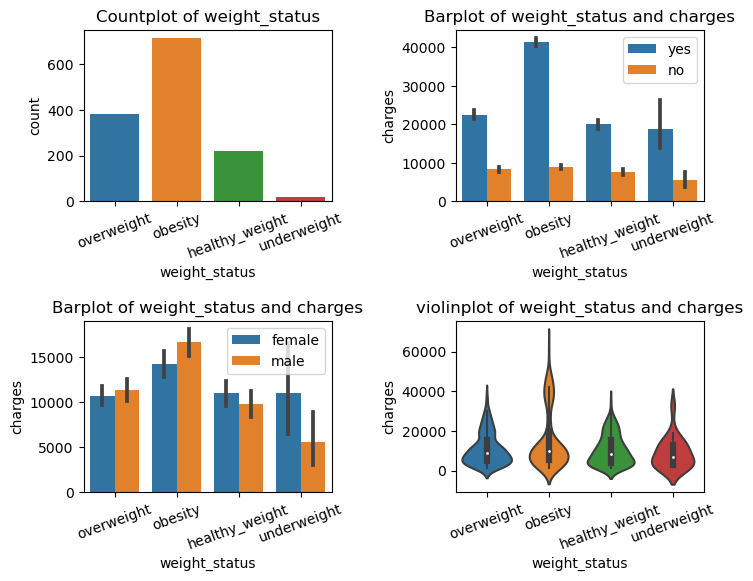

In [98]:
# Weight_status analysis

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.countplot(data=Insurance, x='weight_status')
plt.title('Countplot of weight_status')
plt.xticks(rotation=20)

plt.subplot(2,2,2)
sns.barplot(data=Insurance, x='weight_status', y='charges', hue='smoker')
plt.title('Barplot of weight_status and charges')
plt.legend(loc='upper right')
plt.xticks(rotation=20)

plt.subplot(2,2,3)
sns.barplot(data=Insurance, x='weight_status', y='charges', hue='sex')
plt.title('Barplot of weight_status and charges')
plt.legend(loc='upper right')
plt.xticks(rotation=20)

plt.subplot(2,2,4)
sns.violinplot(data=Insurance, x='weight_status', y='charges')
plt.title('violinplot of weight_status and charges')
plt.xticks(rotation=20)

pl.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()

* Inference*
 
- More than 600 benificiary's are suffering from obesity and among them smokers are in higher number.
- Some beneficiary's who are obese have higher Insurance charges as compared to other.

### 5B. Outliers removal

In [141]:
# Using Inter Quartile Range

def Inter_Quartile_Range_method(data_frame, variable):
    Q1 = np.quantile(data_frame[variable], 0.25)
    Q3 = np.quantile(data_frame[variable], 0.75)
    IQR = Q3 - Q1
    Lower_range = Q1 - 1.5*IQR  
    Upper_range = Q3 + 1.5*IQR
    global outlier_free_df
    outlier_free_list = [x for x in data_frame[variable] if ( (x < (Q3 + 1.5*IQR) ) & (x > (Q1 - 1.5*IQR) ) )]
    print('New shape is ',len(outlier_free_list))
    print( round(( (data_frame.shape[0]-len(outlier_free_list) )/data_frame.shape[0])*100,2),'% of data is removed')
    outlier_free_df = data_frame[data_frame[variable].isin(outlier_free_list)]
    return outlier_free_df  

In [142]:
# Calling the function

Inter_Quartile_Range_method(Insurance, 'bmi')

New shape is  1328
0.67 % of data is removed


,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.924000,overweight
1,18,male,33.770,1,no,southeast,1725.552300,obesity
2,28,male,33.000,3,no,southeast,4449.462000,obesity
3,33,male,22.705,0,no,northwest,21984.470610,healthy_weight
4,32,male,28.880,0,no,northwest,3866.855200,overweight
5,31,female,25.740,0,no,southeast,3756.621600,overweight
6,46,female,33.440,1,no,southeast,8240.589600,obesity
7,37,female,27.740,3,no,northwest,7281.505600,overweight
8,37,male,29.830,2,no,northeast,6406.410700,overweight
9,60,female,25.840,0,no,northwest,28923.136920,overweight


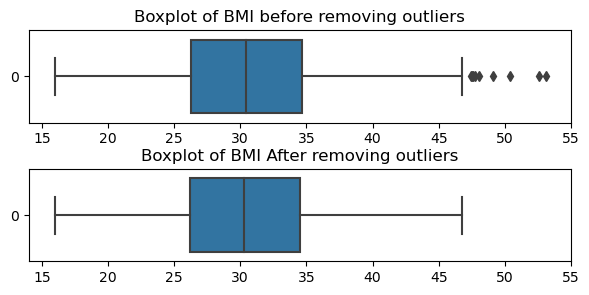

In [143]:
# New data frame name is 'outlier_free_df'
# Visualizing outliers

plt.figure(figsize=(7,3))
plt.subplot(2,1,1)
sns.boxplot(Insurance.bmi, orient='h')
plt.xlim((14,55))
plt.title('Boxplot of BMI before removing outliers')

plt.subplot(2,1,2)
sns.boxplot(outlier_free_df.bmi, orient='h')
plt.xlim((14,55))
plt.title('Boxplot of BMI After removing outliers')

pl.subplots_adjust(hspace=0.5)

### 5C. Converting catagorical variables

In [144]:
# Dataset have four catagorical variables namely 'sex', 'smoker', 'region' and 'weight_status'. 

In [145]:
# Creating a copy of dataset before conversion
Insurance1 = outlier_free_df.copy(deep=True)
outlier_free_df_catagorical = outlier_free_df.select_dtypes(include='object')
outlier_free_df_numerical = outlier_free_df.select_dtypes(include=['float', 'int'])

In [146]:
Insurance1.weight_status.unique()

array(['overweight', 'obesity', 'healthy_weight', 'underweight'],
      dtype=object)

In [147]:
# Mapping numerical values 
outlier_free_df['sex'] = outlier_free_df.sex.map({'female':1, 'male':0})
outlier_free_df['smoker'] = outlier_free_df.smoker.map({'yes':1, 'no':0})
outlier_free_df['region'] = outlier_free_df.region.map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
outlier_free_df['weight_status'] = outlier_free_df.weight_status.map({'overweight':0, 'obesity':1, 'healthy_weight':2, 'underweight':3})

In [148]:
outlier_free_df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,1,27.900,0,1,0,16884.92400,0
1,18,0,33.770,1,0,1,1725.55230,1
2,28,0,33.000,3,0,1,4449.46200,1
3,33,0,22.705,0,0,2,21984.47061,2
4,32,0,28.880,0,0,2,3866.85520,0


###  5D. Feature scaling

In [149]:
# Here we are going to perform Linear Regression (statistical model) therefore will use Standerdization

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
outlier_free_df[['age','bmi']] = standard.fit_transform(outlier_free_df[['age','bmi']])

In [150]:
outlier_free_df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,-1.440429,1,-0.445495,0,1,0,16884.92400,0
1,-1.511669,0,0.546068,1,0,1,1725.55230,1
2,-0.799261,0,0.415999,3,0,1,4449.46200,1
3,-0.443056,0,-1.323037,0,0,2,21984.47061,2
4,-0.514297,0,-0.279953,0,0,2,3866.85520,0


In [151]:
# Splitting the data
x = outlier_free_df.drop('charges', axis=1)
y = outlier_free_df['charges']

In [152]:
# checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
  
vif_data

,feature,VIF
0,age,1.017139
1,sex,1.666905
2,bmi,1.042202
3,children,1.592288
4,smoker,1.211672
5,region,2.100413
6,weight_status,2.129063


*Inference*
- threshold value for VIF is 4 and sience all the values of VIF are less there is no multicollinearity among Inddependant     variables.

### 5E. Feature selection

In [153]:
# Using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

selector = RFE(estimator=lr, n_features_to_select=1)
selector.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [154]:
feature_selection_rfe = pd.DataFrame({'features':x.columns, 'support':selector.support_, 'ranking':selector.ranking_})
feature_selection_rfe

,features,support,ranking
0,age,False,2
1,sex,False,7
2,bmi,False,3
3,children,False,4
4,smoker,True,1
5,region,False,6
6,weight_status,False,5


In [155]:
# Based on RFE features are ranked in order of smoker> age> bmi> children> weight_status> region> sex

### 5D. Splitting dataset 

In [168]:
# splitting data into train and test set
# Using 80-20 split

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [169]:
print('train_x shape is:',train_x.shape)
print('train_y shape is:',train_y.shape)
print('test_x shape is:',test_x.shape)
print('test_y shape is:',test_y.shape)

train_x shape is: (1062, 7)
train_y shape is: (1062,)
test_x shape is: (266, 7)
test_y shape is: (266,)


## 6. Building the model

In [170]:
# This is a Linear Regression problem so we will use 4 models for predicting Insurance charges

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

### Model 1: Linear Regression

In [171]:
# training the model
lr = LinearRegression()
lr = lr.fit(train_x, train_y)

In [172]:
lr.coef_

array([ 3646.08621929,    25.02195742,  2087.65486822,   527.74973364,
       23708.78718944,   522.97682292,   370.77165459])

In [174]:
print('The coefficient of determination of train data is:',lr.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr.score(test_x, test_y))

The coefficient of determination of train data is: 0.7510424466170639
The coefficient of determination of test data is: 0.7457793848472273


In [175]:
# predicting on test data
lr_predict = lr.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 35336342.86
Mean Absolute Error is: 4078.82
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5944.44
Adjusted r squared score: 0.74


*Inference*
- In above model testing score is 0.75 and training score is 0.74, so model is generalized.
- But we need to increase the accuracy of model.
- For increasing the accuracy will perform feature extraction.

### Model 2

In [186]:
# Removing sex variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop('sex', axis=1), y, test_size=0.2, random_state=42)

In [188]:
# training the model
lr_2 = LinearRegression()
lr_2 = lr_2.fit(train_x, train_y)

In [189]:
print('The coefficient of determination of train data is:',lr_2.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_2.score(test_x, test_y))

The coefficient of determination of train data is: 0.7510413827691214
The coefficient of determination of test data is: 0.7457721046885335


In [190]:
# predicting on test data
lr_2_predict = lr_2.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_2_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_2_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_2_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_2_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_2_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_2_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 35337354.79
Mean Absolute Error is: 4080.33
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5944.52
Adjusted r squared score: 0.74


### Model 3

In [231]:
# Removing sex and region variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region'], axis=1), y, test_size=0.2, random_state=42)

In [192]:
# training the model
lr_3 = LinearRegression()
lr_3 = lr_3.fit(train_x, train_y)

In [193]:
lr_3.coef_

array([ 3646.48094682,  1997.31015467,   512.39311663, 23719.1240367 ,
         409.96704289])

In [194]:
print('The coefficient of determination of train data is:',lr_3.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_3.score(test_x, test_y))

The coefficient of determination of train data is: 0.7488418585281867
The coefficient of determination of test data is: 0.7505170110655021


In [195]:
# predicting on test data
lr_3_predict = lr_3.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_3_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_3_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_3_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_3_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_3_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_3_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34677818.83
Mean Absolute Error is: 3983.46
Mean Absolute Percentage Error is: 0.38
Root Mean Squared Error is: 5888.79
Adjusted r squared score: 0.75


### Model 4

In [196]:
# Removing sex, region and weight_status variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region','weight_status'], axis=1), y, test_size=0.2, random_state=42)

In [197]:
# training the model
lr_4 = LinearRegression()
lr_4 = lr_4.fit(train_x, train_y)

In [198]:
print('The coefficient of determination of train data is:',lr_4.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_4.score(test_x, test_y))

The coefficient of determination of train data is: 0.7482794128190506
The coefficient of determination of test data is: 0.7493686287834977


In [199]:
# predicting on test data
lr_4_predict = lr_4.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_4_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_4_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_4_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_4_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_4_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_4_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34837442.51
Mean Absolute Error is: 4044.32
Mean Absolute Percentage Error is: 0.39
Root Mean Squared Error is: 5902.33
Adjusted r squared score: 0.75


### Model 5

In [200]:
# Removing sex, region, weight_status and children variable from data

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop(['sex','region','weight_status', 'children'], axis=1), y, test_size=0.2, random_state=42)

In [201]:
# training the model
lr_5 = LinearRegression()
lr_5 = lr_5.fit(train_x, train_y)

In [202]:
print('The coefficient of determination of train data is:',lr_5.score(train_x, train_y))
print('The coefficient of determination of test data is:',lr_5.score(test_x, test_y))

The coefficient of determination of train data is: 0.7455760106931366
The coefficient of determination of test data is: 0.7488004023499726


In [203]:
# predicting on test data
lr_5_predict = lr_5.predict(test_x)
print('coefficient of determination of predicted values is:',round(r2_score(test_y, lr_5_predict),2))
print('Mean Squared Error is:',round(mean_squared_error(test_y, lr_5_predict),2))
print('Mean Absolute Error is:',round(mean_absolute_error(test_y, lr_5_predict),2))
print('Mean Absolute Percentage Error is:',round(mean_absolute_percentage_error(test_y, lr_5_predict),2))
print('Root Mean Squared Error is:',round(np.sqrt(mean_squared_error(test_y, lr_5_predict)),2))
print('Adjusted r squared score:',round( (1 - ((1-r2_score(test_y, lr_5_predict) )*(test_y.shape[0]-1) /(test_y.shape[0]-test_x.shape[1]-1) )),2))

coefficient of determination of predicted values is: 0.75
Mean Squared Error is: 34916425.26
Mean Absolute Error is: 4091.59
Mean Absolute Percentage Error is: 0.4
Root Mean Squared Error is: 5909.01
Adjusted r squared score: 0.75


In [226]:
# Evaluating models on all parameters

evaluation_metrics = pd.DataFrame({'Model':[1, 2, 3, 4, 5], 
                                   'train_acc':[0.75, 0.75, 0.74, 0.74, 0.74], 
                                   'test_acc':[0.74, 0.74, 0.75, 0.74, 0.74], 
                                   'r^2':[0.75, 0.75, 0.75, 0.75, 0.75], 
                                   'MSE':[35336342.86, 35337354.79, 34677818.83, 34837442.51, 34916425.26], 
                                   'MAE':[4078.82, 4080.33, 3983.46, 4044.32, 4091.59], 
                                   'MAPE':[0.4, 0.4, 0.38, 0.39, 0.4],
                                   'RMSE':[5944.44, 5944.52, 5888.79, 5902.33, 5909.01], 
                                   'adjusted_r2':[0.74, 0.74, 0.75, 0.75, 0.75]
                                  }).set_index('Model')

evaluation_metrics

,train_acc,test_acc,r^2,MSE,MAE,MAPE,RMSE,adjusted_r2
Model,,,,,,,,
1,0.75,0.74,0.75,35336342.86,4078.82,0.40,5944.44,0.74
2,0.75,0.74,0.75,35337354.79,4080.33,0.40,5944.52,0.74
3,0.74,0.75,0.75,34677818.83,3983.46,0.38,5888.79,0.75
4,0.74,0.74,0.75,34837442.51,4044.32,0.39,5902.33,0.75
5,0.74,0.74,0.75,34916425.26,4091.59,0.40,5909.01,0.75


In [225]:
evaluation_metrics.sort_values(by='RMSE', axis=0, ascending=True)

,train_acc,test_acc,r^2,MSE,MAE,MAPE,RMSE,adjusted_r2
Model,,,,,,,,
3,0.74,0.75,0.75,34677818.83,3983.46,0.38,5888.79,0.75
4,0.74,0.74,0.75,34837442.51,4044.32,0.39,5902.33,0.75
5,0.74,0.74,0.75,34916425.26,4091.59,0.40,5909.01,0.75
1,0.75,0.74,0.75,35336342.86,4078.82,0.40,5944.44,0.74
2,0.75,0.74,0.75,35337354.79,4080.33,0.40,5944.52,0.74


*Inference*
- Looking at above table of evaluation parameters it is clear that model 3 gives better results.
- Model 3 is trained without 'sex' and 'region' variables.
- Coefficient of determination value of model 3 is 0.75 and RMSE is 5888.

In [227]:
# Independence of errors assumptions : Durbin watson test
# null hypothesis: there is no serial correlation in the residuals.

from statsmodels.stats.stattools import durbin_watson
error = test_y-lr_3_predict
print('Durbin watson test: ', durbin_watson(error))

Durbin watson test:  1.9362071455712584


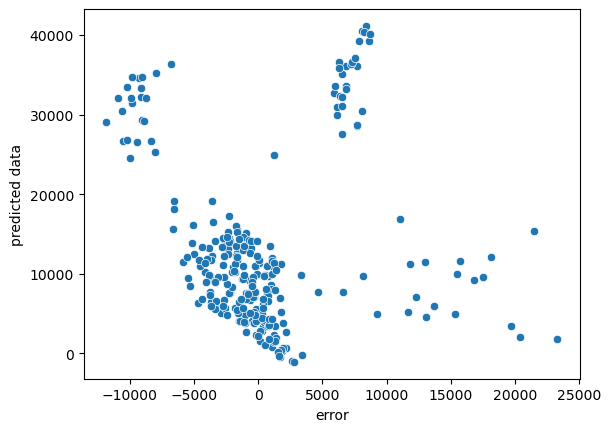

In [228]:
# cheking assumption of homoscadacity 

error = test_y-lr_3_predict
sns.scatterplot(x=error, y=lr_3_predict)
plt.xlabel('error')
plt.ylabel('predicted data')
plt.show()

*Inference*
- Durbin watson value of 1.5 to 2.5 shows that there is no autocorrelation in data.
- from above test durbin watson value is 1.93 which is falling in above range. 
- for checking the assumption of homoscadacity we have ploted scatterplot of residuals and predicted data.
- from scatterplot it is clear that varience is not same for all predicted data points and hence there is a need for transformation of model for improving accuracy of model.

In [234]:
# regression equation 

# y = 7396.67 + age*3646.48 + bmi*1997.31 + children*512.39 + smoker*23719.12 + weight_status*409.96

In [241]:
predicted = pd.DataFrame({'Actual':round(test_y, 2), 'predicted':lr_3_predict, 'error':round(error,2)})
predicted

,Actual,predicted,error
1210,5373.36,7596.706865,-2223.34
115,30260.00,12139.790679,18120.20
986,8410.05,10183.529203,-1773.48
176,6455.86,7193.034979,-737.17
63,4133.64,3441.821916,691.82
619,10713.64,14120.337435,-3406.69
726,6664.69,7652.287846,-987.60
485,4347.02,5849.524425,-1502.50
352,3554.20,4044.473139,-490.27
547,11538.42,18124.255850,-6585.83


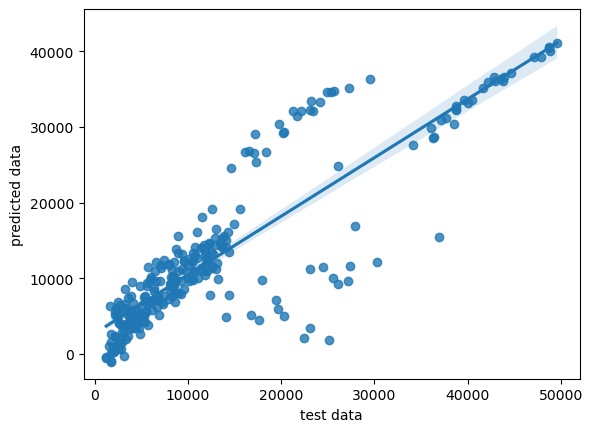

In [242]:
# Visualizing regression plot

sns.regplot(x=test_y, y=lr_3_predict)
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.show()

## Conclusion:

- In this project we have used Linear Regression technique to predict Insurance charges(dependant variable) of beneficiary's based on Independant variables like 'age', 'sex', 'bmi', 'smoker', 'children' and 'region'. 
- In Exploratory data analysis it is found that number of smokers in beneficiery's is very less but at the same time Insurance charges are more for that particular group. Average age and bmi of beneficiary's are 39 and 30 respectivly.
- No significant info is observed in sex and region variables during comparison with Insurance charges. 
- In assumptions check it is found that Independant variables shows linearity with dependant, there is low multicollinearity and  also Independance of errors.
- However assumptions like homoscadacity of residuals and normality of data are not fullfilled.
- Steps like Ckecking nulls, duplicates, categorical conversion, feature engineering, feature scaling are performed in preprocessing of data.
- After building the model it is found that Model 1 is generalized model with r2 of 0.75 but to increase accuracy we performed feature extraction.
- After performing feature extraction on different models, model_3 found to be performing better. In model 3 we have excluded 'sex' and 'region' variables.
- r2 of model 3 is 0.75 but other parameters like MSE, MAE, MAPE, RMSE are less as compared with other models.
- So for Linear regression model 3 is performing better but errors are still need to be reduced. 

## Future Scope

- For Linear regression we got gereralized model, however there is scope for improvement.
- We can try other regression methods like Model tree, Support Vector Machine and ensemble techniques.